# **Python Imports**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# **Data Import & Cleaning**

In [134]:
df = pd.read_csv('data/salaries_data.csv')
print(f"The data contains {df.shape[0]} rows and {df.shape[1]} columns.")

The data contains 2649 rows and 18 columns.


In [135]:
df.head()

,Timestamp,Gender,Degree,BusinessMarket,ProgrammingLanguages,BusinessSize,Title,Level,Yoe,YoeBuckets,TotalCompensationEgp,WorkSetting,BusinessFocus,BusinessLine,TotalCompensationEgpBuckets,Industries,IsEgp,CompanyLocation
0,4/2/2024 11:10:37,Male,Yes,NaN,"PHP, JavaScript, TypeScript, HTML/CSS",A Small and Medium Enterprise,Backend Engineer,Mid-level,5.0,3-5,"42,437.50",Hybrid,Outsourcing Company,B2B & B2C lines,40-50K,"Fintech, Technology",Another currency (e.g USD),Cairo
1,4/2/2024 11:12:13,Male,Yes,NaN,"TypeScript, HTML/CSS",A Small and Medium Enterprise,Frontend Engineer,Mid-level,2.5,1-3,"20,000.00",Hybrid,Product-based company,B2B,20-25K,Human Resources Services,EGP,Cairo
2,4/2/2024 11:15:17,Female,Yes,Global,NaN,A Small and Medium Enterprise,UI/UX Designer/Engineer,Mid-level,2.5,1-3,"42,000.00",Remote/Egypt,Product-based company,B2B,40-50K,Technology,EGP,Cairo
3,4/2/2024 11:18:12,Male,Yes,NaN,"PHP, JavaScript",A Large Enterprise/Multinational Company,Backend Engineer,Junior,1.0,0-1,"16,000.00",Hybrid,Product-based company,B2B,15-20K,Lead Gathering,EGP,Alexandria
4,4/2/2024 11:19:20,Male,Yes,NaN,"JavaScript, TypeScript",A Start-up,Backend Engineer,Senior,2.0,1-3,"101,850.00",Hybrid,Product-based company,B2B & B2C lines,100-120K,"Automotive, Transportation",Another currency (e.g USD),No site in Egypt


In [136]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    2649 non-null   object 
 1   Gender                       2649 non-null   object 
 2   Degree                       2649 non-null   object 
 3   BusinessMarket               2088 non-null   object 
 4   ProgrammingLanguages         2227 non-null   object 
 5   BusinessSize                 2649 non-null   object 
 6   Title                        2649 non-null   object 
 7   Level                        2649 non-null   object 
 8   Yoe                          2649 non-null   float64
 9   YoeBuckets                   2649 non-null   object 
 10  TotalCompensationEgp         2649 non-null   object 
 11  WorkSetting                  2649 non-null   object 
 12  BusinessFocus                2649 non-null   object 
 13  BusinessLine      

,Yoe
count,2649.000000
mean,3.577931
std,3.468985
min,0.000000
25%,1.000000
50%,2.500000
75%,4.500000
max,31.000000


In [137]:
# Renaming columns for better readability
df.rename(columns={
  'Yoe': 'YearsOfExperience',
  'TotalCompensationEgp': 'Salary'
}, inplace=True)

# Dropping unnecessary columns
df.drop(columns=['Timestamp', 'YoeBuckets', 'TotalCompensationEgpBuckets'], inplace=True)

# Converting Salary to a float
df['Salary'] = (
    df['Salary']
    .replace('[,]', '', regex=True)  # Remove commas
    .astype(float)
)

# Remove rows where Salary is zero or missing
df = df[df['Salary'].notna() & (df['Salary'] != 0)]

In [138]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 0 to 2648
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2643 non-null   object 
 1   Degree                2643 non-null   object 
 2   BusinessMarket        2083 non-null   object 
 3   ProgrammingLanguages  2221 non-null   object 
 4   BusinessSize          2643 non-null   object 
 5   Title                 2643 non-null   object 
 6   Level                 2643 non-null   object 
 7   YearsOfExperience     2643 non-null   float64
 8   Salary                2643 non-null   float64
 9   WorkSetting           2643 non-null   object 
 10  BusinessFocus         2643 non-null   object 
 11  BusinessLine          2643 non-null   object 
 12  Industries            2417 non-null   object 
 13  IsEgp                 2643 non-null   object 
 14  CompanyLocation       2038 non-null   object 
dtypes: float64(2), object(13)


,YearsOfExperience,Salary
count,2643.000000,2.643000e+03
mean,3.580378,5.529055e+04
std,3.468751,2.061977e+05
min,0.000000,1.200000e+01
25%,1.000000,1.697500e+04
50%,2.500000,3.000000e+04
75%,4.750000,5.628450e+04
max,31.000000,9.263500e+06


Since the maximum salary here is very extreme (9,263,500 EGP), we are going to drop the values above the 99th percentile for a better clarity of our visualizations.

In [139]:
# Keep only rows with Salary below the 99th percentile
salary_99 = df['Salary'].quantile(0.99)
filtered_df = df[df['Salary'] <= salary_99]

print(f"After filtering, the data contains {filtered_df.shape[0]} rows and {filtered_df.shape[1]} columns. We removed only {df.shape[0] - filtered_df.shape[0]} rows of very extreme values.")
df = filtered_df

After filtering, the data contains 2616 rows and 15 columns. We removed only 27 rows of very extreme values.


In [140]:
# Remove all `and`s in the programming language column, making it easier to split
df["ProgrammingLanguages"] = df["ProgrammingLanguages"].str.replace(" and ", ", ", regex=False) # remove all ands

# **Descriptive Analysis**
For the next part of our analysis, we are going to split the data into two parts. A part where salary is in EGP, and another part where the salary is in any other currencey.


## Entries with EGP Salaries only

In [141]:
egp_salary_df = df[(df['IsEgp'] == "EGP") & (df['CompanyLocation'] != "No site in Egypt")]
egp_salary_df.shape

(1793, 15)

### 5-number summary for Salary and Years of Experience

In [142]:
salary_min = egp_salary_df['Salary'].min()
salary_q1 = egp_salary_df['Salary'].quantile(0.25)
salary_median = egp_salary_df['Salary'].median()
salary_q3 = egp_salary_df['Salary'].quantile(0.75)
salary_max = egp_salary_df['Salary'].max()

yoe_min = egp_salary_df['YearsOfExperience'].min()
yoe_q1 = egp_salary_df['YearsOfExperience'].quantile(0.25)
yoe_median = egp_salary_df['YearsOfExperience'].median()
yoe_q3 = egp_salary_df['YearsOfExperience'].quantile(0.75)
yoe_max = egp_salary_df['YearsOfExperience'].max()

print("5-number summary for Salary (EGP):")
print(f"Min: {salary_min:.2f}")
print(f"Q1: {salary_q1:.2f}")
print(f"Median: {salary_median:.2f}")
print(f"Q3: {salary_q3:.2f}")
print(f"Max: {salary_max:.2f}\n")

print("5-number summary for Years of Experience:")
print(f"Min: {yoe_min:.2f}")
print(f"Q1: {yoe_q1:.2f}")
print(f"Median: {yoe_median:.2f}")
print(f"Q3: {yoe_q3:.2f}")
print(f"Max: {yoe_max:.2f}")

5-number summary for Salary (EGP):
Min: 12.00
Q1: 15000.00
Median: 24000.00
Q3: 40000.00
Max: 330000.00

5-number summary for Years of Experience:
Min: 0.00
Q1: 1.00
Median: 2.00
Q3: 4.00
Max: 31.00


### Outlier analysis for Salary and Years of Experience

In [143]:
# Calculate IQR for Salary
salary_Q1 = egp_salary_df['Salary'].quantile(0.25)
salary_Q3 = egp_salary_df['Salary'].quantile(0.75)
salary_IQR = salary_Q3 - salary_Q1

# Calculate IQR for Years of Experience
yoe_Q1 = egp_salary_df['YearsOfExperience'].quantile(0.25)
yoe_Q3 = egp_salary_df['YearsOfExperience'].quantile(0.75)
yoe_IQR = yoe_Q3 - yoe_Q1

# Outlier conditions
salary_outliers = egp_salary_df[(egp_salary_df['Salary'] < salary_Q1 - 1.5 * salary_IQR) | (egp_salary_df['Salary'] > salary_Q3 + 1.5 * salary_IQR)]
yoe_outliers = egp_salary_df[(egp_salary_df['YearsOfExperience'] < yoe_Q1 - 1.5 * yoe_IQR) | (egp_salary_df['YearsOfExperience'] > yoe_Q3 + 1.5 * yoe_IQR)]

print(f"Salary IQR: {salary_IQR:.2f} (Q1: {salary_Q1:.2f}, Q3: {salary_Q3:.2f})")
print(f"Number of outliers in Salary: {salary_outliers.shape[0]}")
print(f"Years of Experience IQR: {yoe_IQR:.2f} (Q1: {yoe_Q1:.2f}, Q3: {yoe_Q3:.2f})")
print(f"Number of outliers in Years of Experience: {yoe_outliers.shape[0]}")

Salary IQR: 25000.00 (Q1: 15000.00, Q3: 40000.00)
Number of outliers in Salary: 80
Years of Experience IQR: 3.00 (Q1: 1.00, Q3: 4.00)
Number of outliers in Years of Experience: 93


### Visualization of IQR in both Salary and Years of Experience

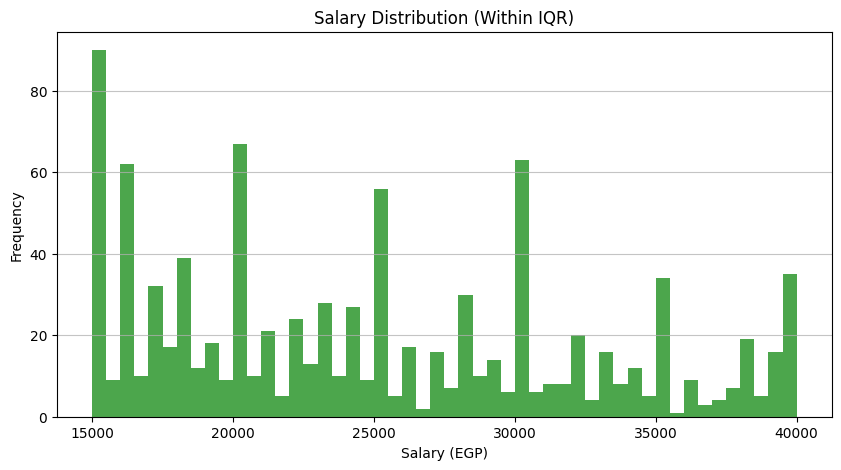

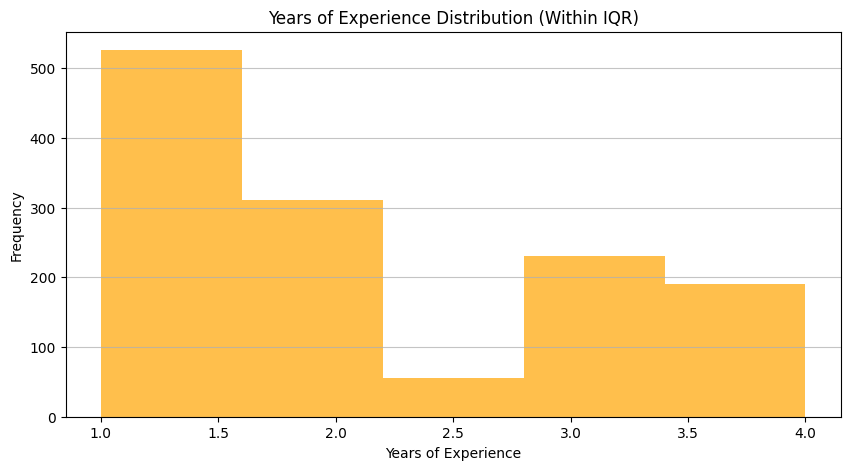

In [144]:
# Filter data within IQR for both Salary and Years of Experience
salary_IQR_df = egp_salary_df[(egp_salary_df['Salary'] >= salary_Q1) & (egp_salary_df['Salary'] <= salary_Q3)]
yoe_IQR_df =  egp_salary_df[(egp_salary_df['YearsOfExperience'] >= yoe_Q1) & (egp_salary_df['YearsOfExperience'] <= yoe_Q3)]

# Visualize Salary and Years of Experience within IQR
plt.figure(figsize=(10,5))
plt.hist(salary_IQR_df['Salary'], bins=50, color='green', alpha=0.7)
plt.title('Salary Distribution (Within IQR)')
plt.xlabel('Salary (EGP)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(yoe_IQR_df['YearsOfExperience'], bins=5, color='orange', alpha=0.7)
plt.title('Years of Experience Distribution (Within IQR)')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.show()

It's clear from the salary distribution that salaries multiples of 5000 are more common all other salaries.

### Correlation between Salary and Years of Experience

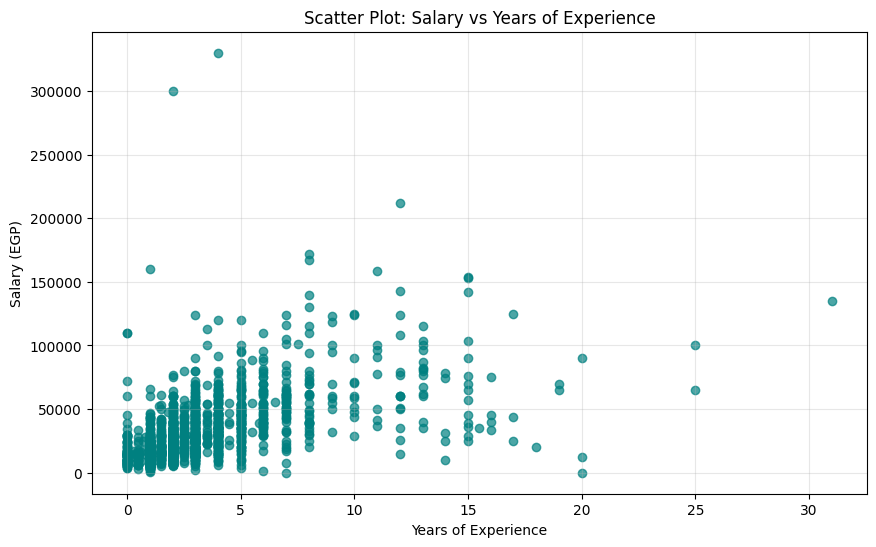

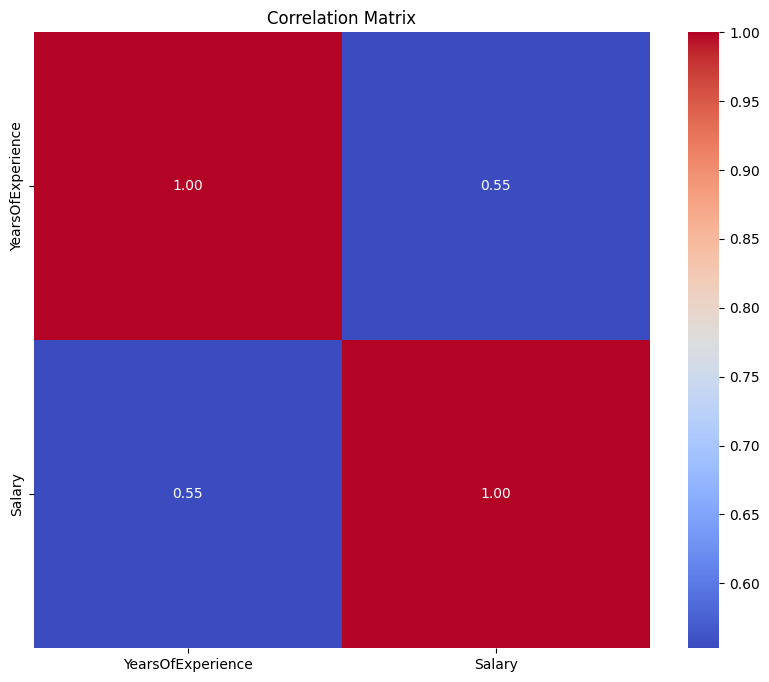

In [145]:
# Scatter plot of Salary vs Years of Experience
plt.figure(figsize=(10,6))
plt.scatter(
    egp_salary_df['YearsOfExperience'],
    egp_salary_df['Salary'],
    alpha=0.7,
    color='teal'
)
plt.title('Scatter Plot: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation matrix (only numeric columns, Salary and Years of Experience)
plt.figure(figsize=(10,8))
numeric_df = egp_salary_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Visualization of Salaries by Gender

/tmp/ipykernel_19537/627874496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=egp_salary_df, x='Gender', palette='pastel')


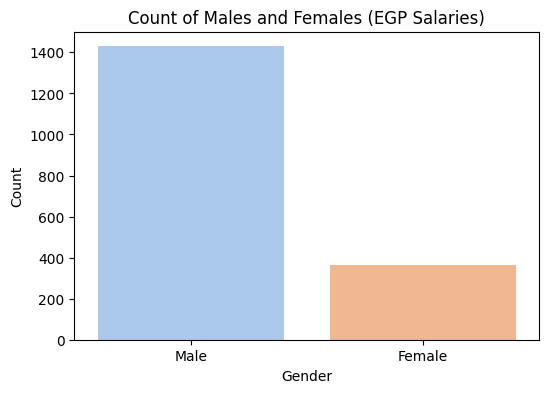

/tmp/ipykernel_19537/627874496.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Gender', y='Salary', palette='pastel')


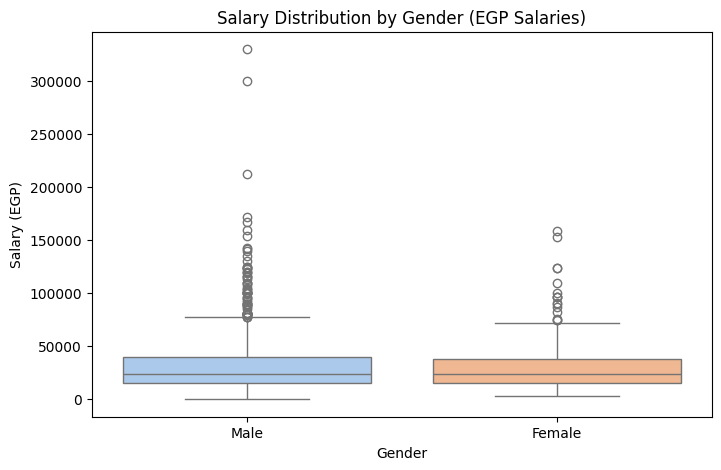

In [146]:
plt.figure(figsize=(6,4))
sns.countplot(data=egp_salary_df, x='Gender', palette='pastel')
plt.title('Count of Males and Females (EGP Salaries)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=egp_salary_df, x='Gender', y='Salary', palette='pastel')
plt.title('Salary Distribution by Gender (EGP Salaries)')
plt.xlabel('Gender')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The ratio between working men and women in software engineering industry is reflected in the first diagram. According to this [report](https://www.statista.com/statistics/1446245/worldwide-developer-gender-distribution/), women represent 20% of the software engineering firm.

### Visualization of Salaries by Level

/tmp/ipykernel_19537/3425243942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=egp_salary_df, x='Level', palette='Set2', order=egp_salary_df['Level'].value_counts().index)


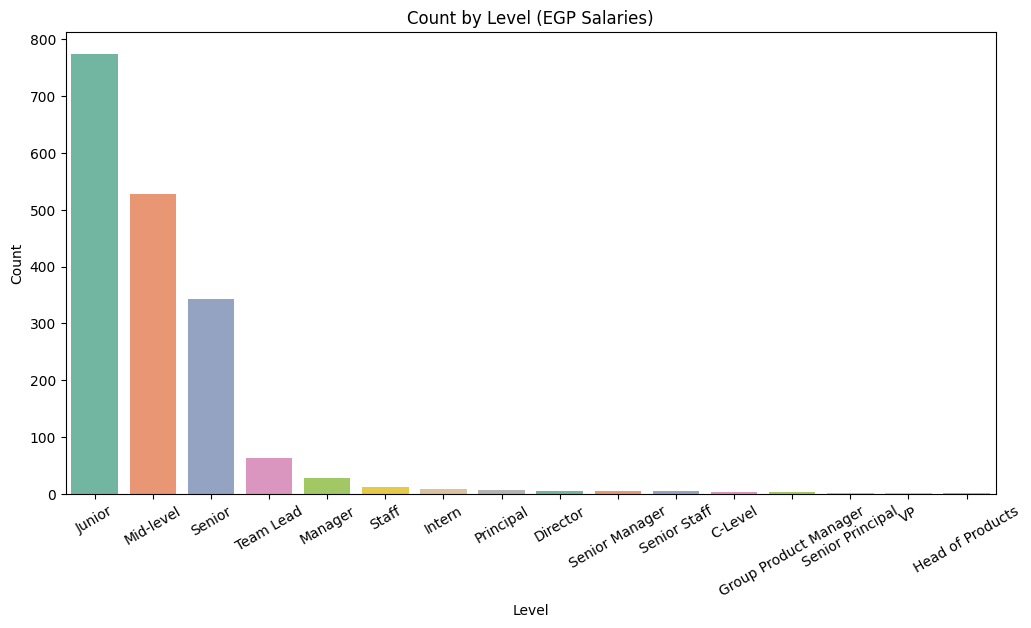

/tmp/ipykernel_19537/3425243942.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Level', y='Salary', palette='Set2', order=egp_salary_df['Level'].value_counts().index)


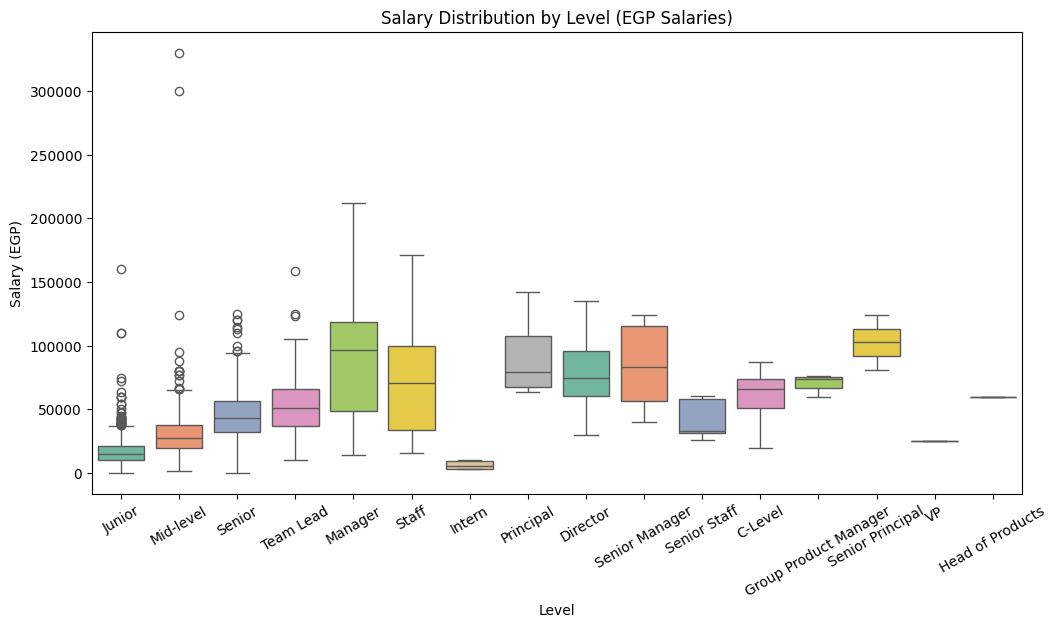

In [147]:
plt.figure(figsize=(12,6))
sns.countplot(data=egp_salary_df, x='Level', palette='Set2', order=egp_salary_df['Level'].value_counts().index)
plt.title('Count by Level (EGP Salaries)')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=egp_salary_df, x='Level', y='Salary', palette='Set2', order=egp_salary_df['Level'].value_counts().index)
plt.title('Salary Distribution by Level (EGP Salaries)')
plt.xlabel('Level')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30)
plt.show()

### Visualization of the top 10 Job Titles with Highest Average Salaries

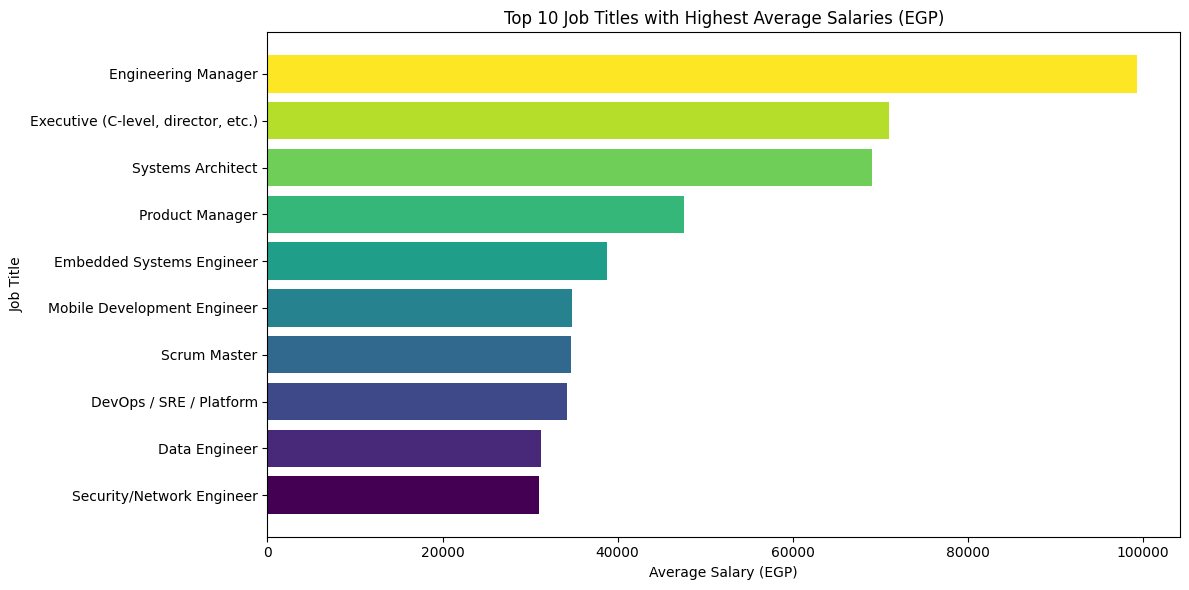

In [148]:
top_10_avg = (
    egp_salary_df.groupby('Title')['Salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
plt.barh(top_10_avg.index[::-1], top_10_avg.values[::-1], color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Top 10 Job Titles with Highest Average Salaries (EGP)')
plt.xlabel('Average Salary (EGP)')
plt.ylabel('Job Title')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

## Visualization of Programming Languages

In [149]:
df_exploded = df.assign(ProgrammingLanguages=df["ProgrammingLanguages"].str.split(", ")).explode("ProgrammingLanguages") # Explode the languages column to allow one language per row
df_exploded["ProgrammingLanguages"] = df_exploded["ProgrammingLanguages"].str.strip().str.lower() # lowercase all languages and remove leading/trailing spaces
language_partitions = {
    lang: df_exploded[df_exploded["ProgrammingLanguages"] == lang]
    for lang in df_exploded["ProgrammingLanguages"].unique()
}
print(f"{len(language_partitions.keys())} unique programming languages found in the dataset.")

103 unique programming languages found in the dataset.


In [150]:
for key, _ in language_partitions.items():
    print(f"{key}: {language_partitions[key].shape[0]}")

php: 194
javascript: 926
typescript: 676
html/css: 647
nan: 0
python: 641
java: 412
c/c++: 153
r: 17
sql: 44
c#: 381
go: 91
kotlin: 108
matlab: 1
python,: 3
ruby: 62
html/css,: 8
dart: 73
scala: 11
vba: 1
m-code: 1
swift: 72
bash script: 3
powershell: 4
bash: 13
pl/sql: 1
abap: 3
outsystems: 4
rust: 7
power bi & excel & google sheets: 1
no programming: 1
verilog / systemverilog: 1
vb.net,uipath,automationanywhere: 1
php,: 2
flutter: 2
yaml: 1
liquid: 1
not a coding job: 1
javascript,: 2
rescript: 2
shell scripting: 3
elixir: 2
no: 1
x++: 3
non: 1
spss: 1
power bi: 1
c: 1
m: 1
esql: 3
system tools: 1
tcl: 1
julia: 1
vb.net: 2
rpa: 1
lisp: 1
groovy: 2
sas: 3
vb: 2
golang: 1
pl sql: 1
no programing: 1
no programing experience required at my role: 1
appian: 1
hcl: 1
t-sql: 2
perl: 1
shell: 3
labview: 1
the product is a language developed by the company: 1
vlang: 1
low code: 1
apex: 2
system verilog: 1
dax: 2
data engineering stack: 1
node.js: 1
matlab script: 1
sql,: 1
visual scripting: 1


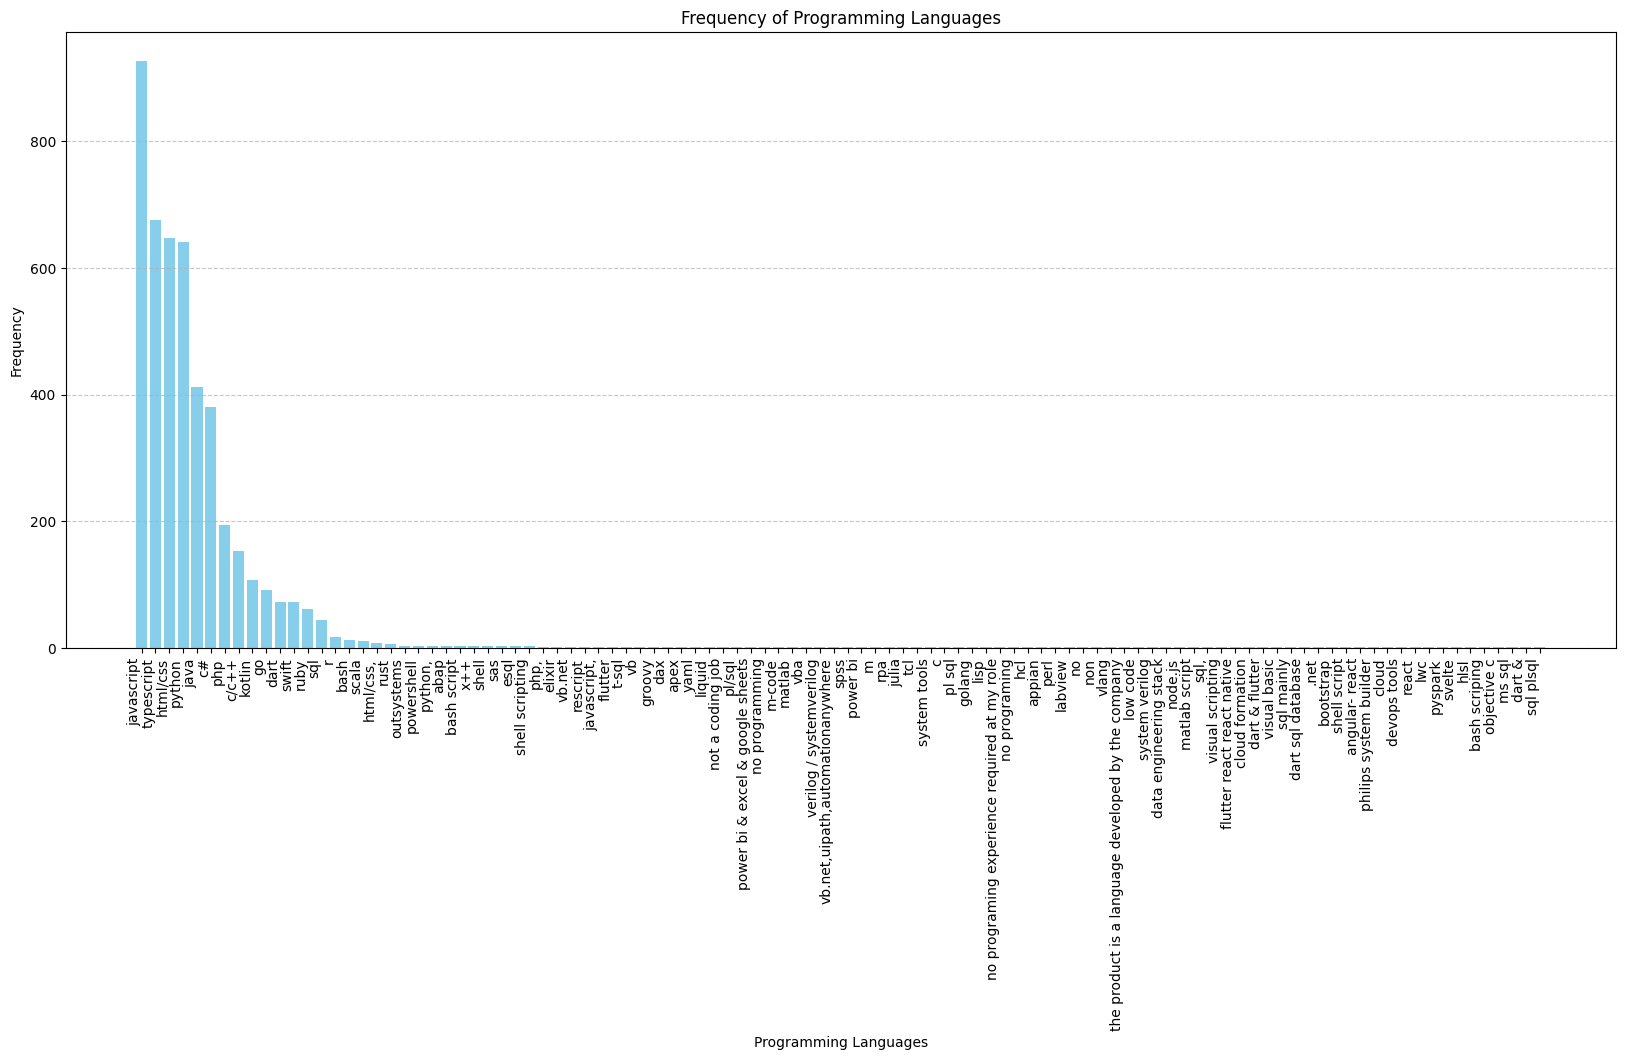

In [151]:
# Calculate the frequency of each language
language_counts = df_exploded["ProgrammingLanguages"].value_counts()

# Plotting
plt.figure(figsize=(20, 8))
plt.bar(language_counts.index, language_counts.values, color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.xlabel("Programming Languages")
plt.ylabel("Frequency")
plt.title("Frequency of Programming Languages")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Inferential Analysis**

## 1- The Experience Myth: Debunk "Women earn less because they're less experienced" with controlled analysis.


In [152]:
# import altair as alt

# # Get the number of unique values in 'BusinessMarket' and list them
# num_business_markets = df['BusinessMarket'].nunique()
# business_markets = df['BusinessMarket'].unique().tolist()

# # Print the number of unique BusinessMarket values and the list of unique values
# print(f"Number of different Business Markets: {num_business_markets}")
# print(f"Business Markets: {business_markets}")

# # Create a value count for BusinessMarket
# business_market_counts = df['BusinessMarket'].value_counts().reset_index()
# business_market_counts.columns = ['BusinessMarket', 'Count']

# # Create a bar chart of the BusinessMarket counts
# chart = alt.Chart(business_market_counts).mark_bar().encode(
#     x='BusinessMarket',
#     y='Count'
# ).properties(
#     title='Distribution of Business Markets'
# )

# # Display the chart
# chart

# # Find the number of entries where CompanyLocation is "No site in Egypt"
# count_no_site_egypt = df[df['CompanyLocation'] == 'No site in Egypt'].shape[0]

# # Print the count of entries with CompanyLocation = "No site in Egypt"
# print(f"Number of entries with CompanyLocation = 'No site in Egypt' after removal: {count_no_site_egypt}")

# # Remove rows where CompanyLocation is "No site in Egypt"
# df = df[df['CompanyLocation'] != 'No site in Egypt'].copy()

df = egp_salary_df.copy()

In [153]:
# check how many jobs are in the global business market and which aren't
df['BusinessMarket'].value_counts()

BusinessMarket
Regional    552
Global      533
Local       381
Name: count, dtype: int64

In [154]:
# check mean experience levels for both genders
df.groupby('Gender')['YearsOfExperience'].mean()

Gender
Female    3.125549
Male      3.098355
Name: YearsOfExperience, dtype: float64

In [155]:
# check level of employees
df['Level'].value_counts()

Level
Junior                   774
Mid-level                528
Senior                   343
Team Lead                 63
Manager                   29
Staff                     13
Intern                     8
Principal                  7
Director                   6
Senior Manager             6
Senior Staff               5
C-Level                    4
Group Product Manager      3
Senior Principal           2
VP                         1
Head of Products           1
Name: count, dtype: int64

- Conduct **Welch's independant t-test** on salaries for both genders

In [156]:
from scipy import stats

# FIRST LETS CONDUCT AN INDEPENDANT T-TEST BETWEEN MEANS OF SALARY AND GENDER AS A STARTING POINT
# - Null hypothesis: There is no pay gap between men and woman
# - Alternative hypothesis: There is a pay gap between men and woman
# - Alpha value: 0.05

# Get the complete salary arrays for both genders
men_salaries = df[df['Gender'] == 'Male']['Salary']
women_salaries = df[df['Gender'] == 'Female']['Salary']

# Calculate and print the mean salaries
mean_salary_men = men_salaries.mean()
mean_salary_women = women_salaries.mean()
print(f"Mean salary of men: {mean_salary_men:.2f}")
print(f"Mean salary of women: {mean_salary_women:.2f}")
print(f"Raw difference: {mean_salary_men - mean_salary_women:.2f}")

# Run the t-test on the full arrays of salary values
t_statistic, p_value = stats.ttest_ind(men_salaries, women_salaries, equal_var=False)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value is less than the alpha level
if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant pay gap between men and women.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence of a pay gap between men and women.")

Mean salary of men: 31106.49
Mean salary of women: 29599.97
Raw difference: 1506.52
T-statistic: 1.1114
P-value: 0.2668
Fail to reject the null hypothesis: There is no significant evidence of a pay gap between men and women.


In [157]:
# Find out the top 2 percent of earners in both genders
men_salaries_sorted = men_salaries.sort_values(ascending=False)
women_salaries_sorted = women_salaries.sort_values(ascending=False)

top_2_percent_men = int(0.02 * len(men_salaries_sorted))
top_2_percent_women = int(0.02 * len(women_salaries_sorted))

top_2_percent_men_salaries = men_salaries_sorted[:top_2_percent_men]
top_2_percent_women_salaries = women_salaries_sorted[:top_2_percent_women]

print(f"Top 2% of men salaries: {top_2_percent_men_salaries.values}")
print(f"Top 2% of women salaries: {top_2_percent_women_salaries.values}")

Top 2% of men salaries: [330000. 300000. 212000. 171470. 167000. 160000. 154000. 143000. 142000.
 140000. 135000. 130000. 125000. 125000. 124000. 124000. 123000. 120000.
 120000. 118750. 116000. 115000. 115000. 113000. 110000. 110000. 110000.
 108000.]
Top 2% of women salaries: [158750. 152800. 124000. 124000. 110000. 100000.  96666.]


**Note**: We notice a pretty big difference in the top 2 percent of earners between both genders

In [158]:
# find all categorical variables so i can run regression analysis on them
categorical_variables = df.select_dtypes(include=['object']).columns
print(categorical_variables)

Index(['Gender', 'Degree', 'BusinessMarket', 'ProgrammingLanguages',
       'BusinessSize', 'Title', 'Level', 'WorkSetting', 'BusinessFocus',
       'BusinessLine', 'Industries', 'IsEgp', 'CompanyLocation'],
      dtype='object')


- Now we shall conduct **regression analysis** to check if the gap persists after controlling for experience and other factors.


Mean Squared Error: 334255348.42
R-squared: 0.35

Feature Importance:
             Feature  Coefficient  Abs_Coefficient
0  YearsOfExperience  4600.927482      4600.927482


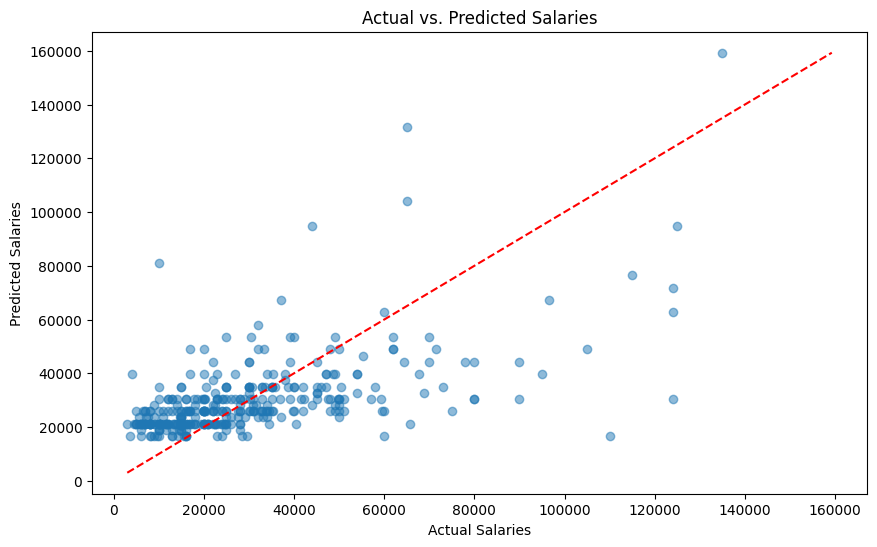

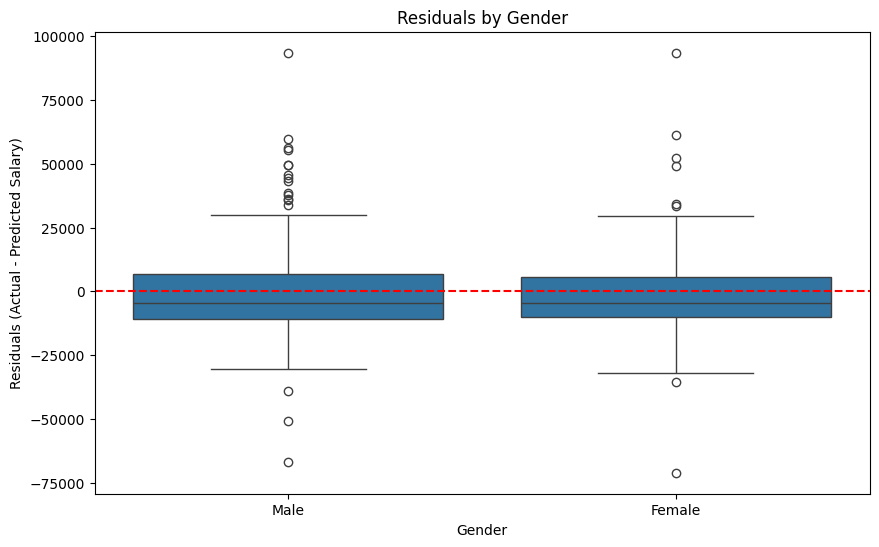

In [159]:
# first we import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Create dummy variables for categorical features
# First, identify columns that might be relevant
# IMPORTANT: Exclude 'YearsOfExperience' as it's already numerical
# Make sure to include all object/category columns you want to encode
categorical_features_for_dummies = [
    'Gender',
    'Level',
    'BusinessMarket',
    'Degree',
    'Title',
    'BusinessLine',
    'BusinessSize',
    'ProgrammingLanguage',
    'WorkSetting', # Added these from the Oaxaca section's categorical_vars
    'BusinessFocus',
    'CompanyLocation'
]

# create a copy of the df to avoid modifying the original
model_df = df.copy()

# One-hot encode categorical variables and drop original columns
for feature in categorical_features_for_dummies:
    if feature in model_df.columns:
        # Handle potential NaN values in the categorical column before getting dummies
        # Fill NaN with a placeholder (e.g., 'Unknown')
        model_df[feature] = model_df[feature].fillna('Unknown')

        dummies = pd.get_dummies(model_df[feature], prefix=feature, drop_first=True)
        model_df = pd.concat([model_df, dummies], axis=1)

        # drop the original categorical column AFTER creating dummies
        model_df.drop(feature, axis=1, inplace=True)


# 2. Select relevant features for predicting salary
# Now model_df should contain YearsOfExperience, Salary, and dummy variables
# Ensure all columns are numerical before splitting by selecting dtypes
model_df = model_df.select_dtypes(include=[np.number])

# Drop any potential columns that ended up as non-numeric or are not features/target
# (This step might be redundant if select_dtypes worked perfectly, but adds robustness)
# Example: Check for any remaining 'object' columns just in case
for col in model_df.columns:
    if model_df[col].dtype == 'object':
        print(f"Warning: Found object column '{col}' after dtypes selection. Dropping.")
        model_df.drop(col, axis=1, inplace=True)


relevant_features = [col for col in model_df.columns if col != 'Salary']

# 3. Split data into training and testing sets
X = model_df[relevant_features]
y = model_df['Salary']

# Ensure no NaN/Infinity values in X or y before splitting and training
# It's better to drop NaNs before the split if necessary
# X.dropna(inplace=True) # This modifies X in place
# y = y.loc[X.index] # Keep corresponding y values
# Or, better, drop NaNs from the combined data before splitting
# Assuming rows with NaN in features or target should be removed
data_for_split = model_df[relevant_features + ['Salary']].dropna()
X = data_for_split[relevant_features]
y = data_for_split['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# 6. Analyze feature importance - focus on gender coefficient
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# sort by absolute coefficient value to see the most important features in prediciting salary
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("\nFeature Importance:")
# Print more features to see which ones have the highest coefficients
print(feature_importance.head(10)) # Increased head to 10

# 7. Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
# Use min/max of test set for line, or better, the overall min/max of actual and predicted
all_vals = np.concatenate((y_test, y_pred))
plt.plot([all_vals.min(), all_vals.max()], [all_vals.min(), all_vals.max()], 'r--')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# 8. Analyze residuals by gender to check for bias
# Need to align residuals with the original gender information from df
# Filter the original df to match the index of the test set
df_test_subset = df.loc[y_test.index].copy()

# Calculate residuals using the test set actual and predicted values
residuals = y_test - y_pred

# Check if 'Gender' is still in the subset (it should be after filtering)
if 'Gender' in df_test_subset.columns:
    plt.figure(figsize=(10, 6))
    # Plot residuals against gender from the corresponding subset of the original df
    # Ensure 'Gender' column type is suitable for seaborn (e.g., category or object)
    sns.boxplot(x=df_test_subset['Gender'].astype(str), y=residuals) # Cast to string to avoid potential issues
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Gender')
    plt.ylabel('Residuals (Actual - Predicted Salary)')
    plt.title('Residuals by Gender')
    plt.show()
else:
    print("'Gender' column not found in the test subset of the original DataFrame.")


Salary comparison by experience bracket and gender:
                                  mean  count           std
ExperienceBracket Gender                                   
0-2 years         Female  16101.735847    118  11568.732891
                  Male    17459.710462    541  12422.534995
3-5 years         Female  29116.821311    183  13826.112796
                  Male    31490.652967    610  23681.020848
6-10 years        Female  44689.042553     47  19229.730355
                  Male    53790.253081    211  27850.929782
11-15 years       Female  92981.600000     10  40012.579509
                  Male    69012.071429     42  36495.165710
15+ years         Female  85967.333333      6  34586.568530
                  Male    61916.996000     25  42957.983252


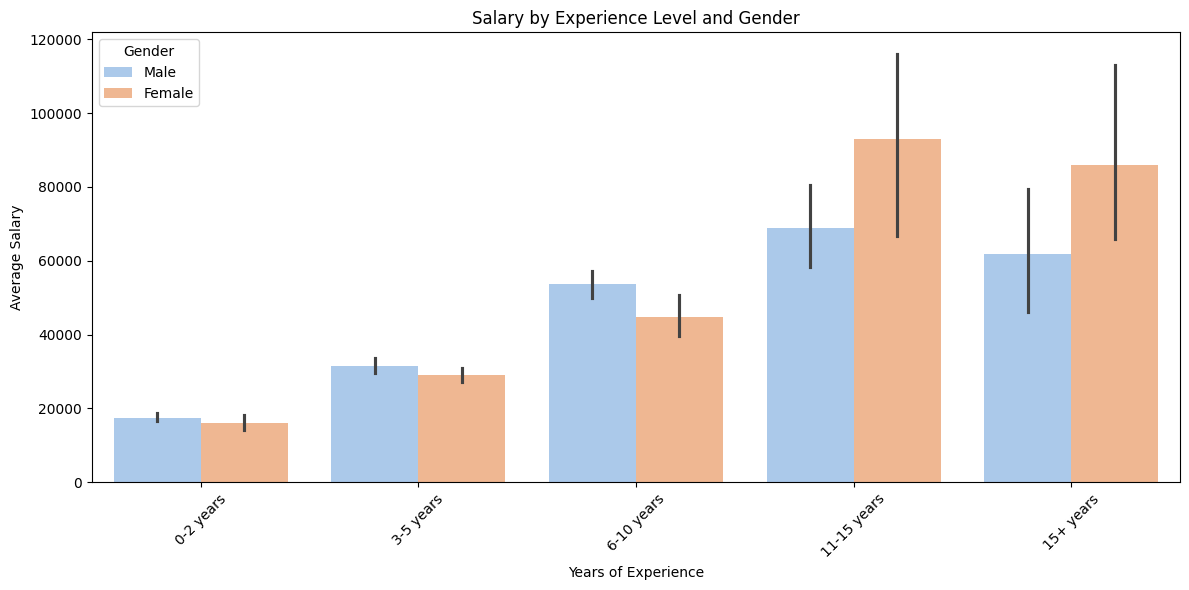


--- Regression by Experience Bracket ---

Regression results for experience bracket: 3-5 years
Gender coefficient: 2439.90
p-value for gender: 0.1708
R-squared: 0.07

Regression results for experience bracket: 0-2 years
Gender coefficient: 1402.72
p-value for gender: 0.2606
R-squared: 0.01

Regression results for experience bracket: 6-10 years
Gender coefficient: 10738.59
p-value for gender: 0.0082
R-squared: 0.13

Regression results for experience bracket: 15+ years
Gender coefficient: -27682.84
p-value for gender: 0.1603
R-squared: 0.09

Regression results for experience bracket: 11-15 years
Gender coefficient: -24399.13
p-value for gender: 0.0694
R-squared: 0.07


In [160]:
import statsmodels.api as sm
# 9. Create experience brackets
# Ensure 'YearsOfExperience' exists before creating brackets
if 'YearsOfExperience' in df.columns:
    df['ExperienceBracket'] = pd.cut(df['YearsOfExperience'],
                                    bins=[0, 2, 5, 10, 15, float('inf')],
                                    labels=['0-2 years', '3-5 years', '6-10 years', '11-15 years', '15+ years'],
                                    right=False) # Use right=False for bins like [0, 2), [2, 5), etc.
else:
    print("'YearsOfExperience' not found in df. Cannot create ExperienceBracket.")
    # You might want to exit or handle this case if YearsOfExperience is critical


# 10. Compare salaries by gender within each experience bracket
# Check if 'ExperienceBracket' was successfully created
if 'ExperienceBracket' in df.columns:
    # Ensure 'Gender' is also present
    if 'Gender' in df.columns:
        # Filter out any rows where ExperienceBracket is NaN before grouping
        experience_gender_analysis = df.dropna(subset=['ExperienceBracket']).groupby(['ExperienceBracket', 'Gender'], observed=True)['Salary'].agg(['mean', 'count', 'std'])
        print("\nSalary comparison by experience bracket and gender:")
        print(experience_gender_analysis)

        # 11. Visual comparison of gender pay gap across experience levels
        plt.figure(figsize=(12, 6))
        # Use the data without NaN ExperienceBracket for plotting
        sns.barplot(x='ExperienceBracket', y='Salary', hue='Gender', data=df.dropna(subset=['ExperienceBracket']), errorbar='ci', palette='pastel') # Use errorbar for confidence intervals
        plt.title('Salary by Experience Level and Gender')
        plt.xlabel('Years of Experience')
        plt.ylabel('Average Salary')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 12. Run separate regression for each experience bracket
        print("\n--- Regression by Experience Bracket ---")
        # Filter out rows where ExperienceBracket is NaN before iterating
        # Use the same model_df structure as the overall regression for consistency if possible
        # However, for a simple regression with only Gender and YearsOfExperience,
        # we can use the original df subset as long as we handle dummies correctly.

        # Let's create dummy Gender_Male directly in the bracket_df subset
        df['Gender_Male'] = (df['Gender'] == 'Male').astype(int)

        for bracket in df['ExperienceBracket'].dropna().unique():
            bracket_df = df[df['ExperienceBracket'] == bracket].copy()

            # Simple regression with minimal controls for this demonstration
            # Ensure YearsOfExperience exists in the bracket_df
            if 'YearsOfExperience' in bracket_df.columns and 'Gender_Male' in bracket_df.columns:
                X = bracket_df[['Gender_Male', 'YearsOfExperience']].copy() # Use .copy() to avoid SettingWithCopyWarning
                y = bracket_df['Salary']

                # Ensure there are enough data points for the regression
                # Need at least (number of features + 1 for constant) observations
                if len(bracket_df) > X.shape[1] + 1: # +1 because sm.add_constant adds a feature
                    # Add constant for intercept
                    X = sm.add_constant(X)

                    # Fit model
                    try:
                        model = sm.OLS(y, X.astype(float)).fit() # Cast X to float just in case

                        print(f"\nRegression results for experience bracket: {bracket}")
                        # Check if 'Gender_Male' parameter exists before printing
                        if 'Gender_Male' in model.params:
                            print(f"Gender coefficient: {model.params['Gender_Male']:.2f}")
                            print(f"p-value for gender: {model.pvalues['Gender_Male']:.4f}")
                        else:
                             print("Gender_Male coefficient not found in model params (perhaps only one gender in this bracket?)")
                        print(f"R-squared: {model.rsquared:.2f}")
                    except Exception as e:
                         print(f"Could not fit regression for bracket {bracket}: {e}")
                else:
                    print(f"\nNot enough data points ({len(bracket_df)}) for regression in experience bracket: {bracket}")
                    print(f"Required: > {X.shape[1] + 1} data points.")
            else:
                print(f"\nMissing required columns (Gender_Male or YearsOfExperience) for regression in experience bracket: {bracket}")
    else:
         print("'Gender' column not found in df. Cannot perform gender-based analysis.")
else:
    print("'ExperienceBracket' was not successfully created. Skipping bracket analysis.")

***Advanced analysis: Oaxaca-Blinder Decomposition*** (https://en.wikipedia.org/wiki/Blinder%E2%80%93Oaxaca_decomposition)


--- Oaxaca-Blinder Decomposition Results (Overall) ---
Total Gender Wage Gap: -1506.52
Explained Component (due to differences in characteristics): 1051.89 (-69.8%)
Unexplained Component (potentially due to discrimination): -2558.42 (169.8%)


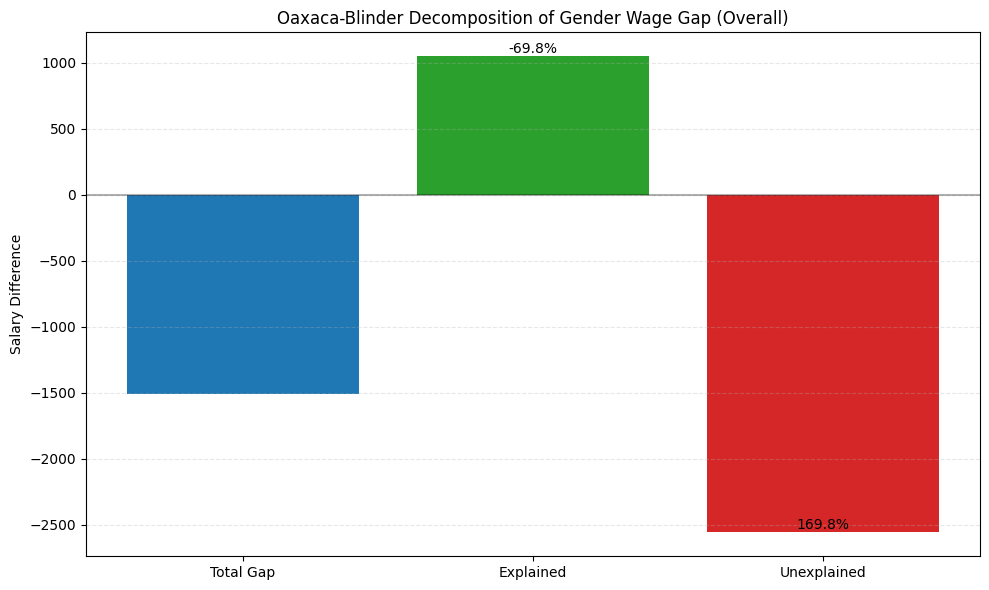


--- Oaxaca-Blinder Decomposition by Experience Bracket ---


In [161]:
# ipython-input-66-e99119cb74f0
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is imported if used for plotting

# Function to perform Oaxaca-Blinder decomposition
def oaxaca_blinder_decomposition(df, outcome_var, group_var, control_vars):
    """
    Performs Oaxaca-Blinder decomposition for wage gap analysis

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset
    outcome_var : str
        The dependent variable (e.g., 'Salary')
    group_var : str
        The group variable (e.g., 'Gender')
    control_vars : list
        List of control variables (column names)

    Returns:
    --------
    tuple
        (explained_gap, unexplained_gap, total_gap)
    """
    # Filter data into two groups
    group_values = df[group_var].unique()
    # Remove potential NaN if it exists
    group_values = [val for val in group_values if pd.notna(val)]

    if len(group_values) != 2:
        print(f"Warning: Group variable '{group_var}' must have exactly 2 non-NaN values, found {len(group_values)}: {group_values}. Skipping decomposition.")
        return None, None, None # Return None if decomposition is not possible

    group_a_name = group_values[0]
    group_b_name = group_values[1]

    group_a = df[df[group_var] == group_a_name].copy() # Use copy to avoid SettingWithCopyWarning
    group_b = df[df[group_var] == group_b_name].copy()

    # Drop rows with NaN in outcome or control variables before fitting models
    group_a.dropna(subset=[outcome_var] + control_vars, inplace=True)
    group_b.dropna(subset=[outcome_var] + control_vars, inplace=True)

    # Add constant for intercept
    # Select only the specified control variables and cast to float
    X_a = sm.add_constant(group_a[control_vars].astype(float), has_constant='add') # Explicitly add constant
    X_b = sm.add_constant(group_b[control_vars].astype(float), has_constant='add')

    y_a = group_a[outcome_var]
    y_b = group_b[outcome_var]

    # Check if groups have enough data points after dropping NaNs
    if len(group_a) < X_a.shape[1] or len(group_b) < X_b.shape[1]:
        print(f"Warning: Not enough data points for decomposition in groups {group_a_name} ({len(group_a)}) or {group_b_name} ({len(group_b)}). Required > {X_a.shape[1]} per group. Skipping.")
        return None, None, None


    # Mean outcome difference (using the data *after* dropping NaNs)
    mean_diff = y_b.mean() - y_a.mean()

    # Fit models for each group
    try:
        model_a = sm.OLS(y_a.astype(float), X_a).fit() # Cast y to float
        model_b = sm.OLS(y_b.astype(float), X_b).fit() # Cast y to float
    except Exception as e:
        print(f"Could not fit OLS model during decomposition: {e}. Skipping.")
        return None, None, None


    # Calculate means of control variables for each group (using the data *after* dropping NaNs)
    X_a_mean = X_a.mean()
    X_b_mean = X_b.mean()

    # Ensure the indices of params and means match, which should be the case
    # if using the column names consistently.
    # Calculate explained and unexplained components
    # Using the standard Blinder-Oaxaca 3-fold decomposition formula
    # Explained (Endowments): (Mean_B - Mean_A) * Coeff_B
    # Unexplained (Coefficients + Interaction): Mean_A * (Coeff_B - Coeff_A) + (Mean_B - Mean_A) * (Coeff_B - Coeff_A)
    # A common decomposition:
    # Explained = (Mean_B - Mean_A) * Coeff_A (Using Group A coefficients as reference) OR
    # Explained = (Mean_B - Mean_A) * Coeff_B (Using Group B coefficients as reference)
    # Unexplained = Mean_A * (Coeff_B - Coeff_A) (If using Coeff_A as reference) OR
    # Unexplained = Mean_B * (Coeff_B - Coeff_A) (If using Coeff_B as reference)
    # The formula used in the original code (unexplained = np.sum(X_a_mean * (model_b.params - model_a.params)))
    # implies that the coefficient difference (model_b.params - model_a.params) is weighted by
    # the means of group A. This is one valid way, often referred to as the 'A-based' decomposition
    # for the unexplained component and 'B-based' for the explained component if using:
    # Explained = (Mean_B - Mean_A) * Coeff_B
    # Unexplained = Mean_A * (Coeff_B - Coeff_A)

    # Let's stick to the original formula structure but ensure alignment
    # Ensure parameter names are consistent
    common_params = list(set(model_a.params.index) & set(model_b.params.index))

    # Ensure the means series have the same index as the common params
    X_a_mean_aligned = X_a_mean[common_params]
    X_b_mean_aligned = X_b_mean[common_params]

    # Align parameters by the common index
    params_a_aligned = model_a.params[common_params]
    params_b_aligned = model_b.params[common_params]


    # Recalculate Explained and Unexplained using aligned parameters and means
    # Based on the original structure:
    explained = np.sum((X_b_mean_aligned - X_a_mean_aligned) * params_b_aligned)
    unexplained = np.sum(X_a_mean_aligned * (params_b_aligned - params_a_aligned))
    # Note: Explained + Unexplained might not exactly equal mean_diff due to the
    # choice of weighting (Mean_B for explained, Mean_A for unexplained).
    # A more standard approach for a simple decomposition might use a weighted average
    # of coefficients or a single reference group.
    # For simplicity and to match the original code structure, we keep this formula.
    # Let's recalculate total_gap using the decomposition components as a check
    decomposition_total_gap = explained + unexplained

    # Use the calculated mean_diff as the primary total gap
    # The decomposition total gap might differ slightly due to the approximation inherent in the formula
    # if the model includes interaction terms or non-linearities (which it doesn't in this OLS case).
    # However, using different reference weights (A vs B) can make Explained+Unexplained != Mean_B - Mean_A.
    # The standard Blinder-Oaxaca is (Mean_B - Mean_A) * Coeff_ref + Mean_ref * (Coeff_B - Coeff_A)
    # where ref is A, B, or a pooled model.
    # Let's use the Mean_B - Mean_A as the total gap, and report explained/unexplained based on
    # the formula in the original code structure, acknowledging it's one of several decomposition methods.
    # The sum of the explained and unexplained components from this specific formulation
    # should approximate the total gap (Mean_B - Mean_A).

    return explained, unexplained, mean_diff

# Prepare data for decomposition
# Use the model_df which already has dummy variables created from the previous cell
# We will use the model_df created earlier, assuming it's available in the environment.
# If running this cell independently, you would need to recreate model_df.

# Select control variables (adjust as needed)
# These should be the columns from model_df that are NOT 'Salary' or the original 'Gender' (which was dropped)
# The 'relevant_features' list from the previous cell is a good starting point
# Ensure 'Gender' is *not* in control_variables if it's the group_var
control_variables_for_oaxaca = [col for col in model_df.columns if col != 'Salary' and not col.startswith('Gender_')]
# We need to make sure the 'Gender_Male' dummy (assuming Male is the reference group)
# is implicitly handled by the *exclusion* of the other gender group's dummy in X_a/X_b
# and is NOT in the control_variables list passed to the function, as 'Gender' is the group_var itself.

# The function filters by group_var ('Gender') and builds X using control_vars *within* each group.
# The original Gender column must be present in the df *passed to the function*.
# Let's go back to using the original df but create dummies needed for controls inside the function,
# or ensure the model_df we use *has* the original Gender column AND the dummy columns for controls.

# Let's re-prepare model_df ensuring original 'Gender' is kept for filtering *and* dummies are created for controls.
model_df_oaxaca = df.copy()

categorical_vars_oaxaca = ['Degree', 'BusinessMarket', 'BusinessSize', 'Title', 'Level',
                           'WorkSetting', 'BusinessFocus', 'CompanyLocation', 'ProgrammingLanguage'] # Include ProgrammingLanguage

# Create dummies for control variables, keep original Gender
for var in categorical_vars_oaxaca:
    if var in model_df_oaxaca.columns and model_df_oaxaca[var].dtype == 'object':
        model_df_oaxaca[var] = model_df_oaxaca[var].fillna('Unknown')
        dummies = pd.get_dummies(model_df_oaxaca[var], prefix=var, drop_first=True)
        model_df_oaxaca = pd.concat([model_df_oaxaca, dummies], axis=1)
        # Do NOT drop the original 'Gender' column here, but drop the others
        if var != 'Gender':
             model_df_oaxaca.drop(var, axis=1, inplace=True)

# Ensure original 'Gender' is still in the DataFrame and is not NaN for filtering
model_df_oaxaca.dropna(subset=['Gender'], inplace=True)


# Define control variables list
# This list should contain 'YearsOfExperience' and ALL the dummy column names created above
# EXCLUDE the original 'Gender' column itself as it's the grouping variable
control_variables_oaxaca = ['YearsOfExperience']
control_variables_oaxaca.extend([col for col in model_df_oaxaca.columns if any(col.startswith(prefix) for prefix in [c + '_' for c in categorical_vars_oaxaca])])
# Ensure 'Salary' is not accidentally in control variables
control_variables_oaxaca = [c for c in control_variables_oaxaca if c != 'Salary']


# Check if all control variables exist in the dataframe columns
missing_controls = [c for c in control_variables_oaxaca if c not in model_df_oaxaca.columns]
if missing_controls:
    print(f"Error: Missing control variables in model_df_oaxaca: {missing_controls}")
    # Decide how to handle this - maybe filter control_variables_oaxaca or investigate why they are missing.
    # For now, let's filter the list to only include existing columns
    control_variables_oaxaca = [c for c in control_variables_oaxaca if c in model_df_oaxaca.columns]
    print(f"Proceeding with existing control variables: {control_variables_oaxaca}")


# Perform decomposition on the whole dataset
print("\n--- Oaxaca-Blinder Decomposition Results (Overall) ---")
explained_overall, unexplained_overall, total_gap_overall = oaxaca_blinder_decomposition(
    model_df_oaxaca, # Use the dataframe with dummies
    outcome_var='Salary',
    group_var='Gender',
    control_vars=control_variables_oaxaca # Use the list of dummy and numeric control columns
)

# Print and visualize overall results only if decomposition was successful
if explained_overall is not None:
    print(f"Total Gender Wage Gap: {total_gap_overall:.2f}")
    # Handle the case where total_gap_overall is zero to avoid division by zero
    if total_gap_overall != 0:
        print(f"Explained Component (due to differences in characteristics): {explained_overall:.2f} ({explained_overall/total_gap_overall*100:.1f}%)")
        print(f"Unexplained Component (potentially due to discrimination): {unexplained_overall:.2f} ({unexplained_overall/total_gap_overall*100:.1f}%)")
    else:
         print(f"Explained Component: {explained_overall:.2f}")
         print(f"Unexplained Component: {unexplained_overall:.2f}")
         print("Total gap is zero, percentages are not meaningful.")


    # Visualize the decomposition
    plt.figure(figsize=(10, 6))
    components = ['Total Gap', 'Explained', 'Unexplained']
    values = [total_gap_overall, explained_overall, unexplained_overall]
    colors = ['#1f77b4', '#2ca02c', '#d62728']

    plt.bar(components, values, color=colors)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Oaxaca-Blinder Decomposition of Gender Wage Gap (Overall)')
    plt.ylabel('Salary Difference')
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Add percentage labels
    if total_gap_overall != 0:
        for i, v in enumerate(values):
            if i > 0:  # Only for Explained and Unexplained
                plt.text(i, v, f"{v/total_gap_overall*100:.1f}%",
                         color='black', ha='center', va='bottom') # Position text above bars


    plt.tight_layout()
    plt.show()

else:
    print("\nOverall Oaxaca-Blinder decomposition could not be performed.")


# Perform decomposition for each experience bracket
print("\n--- Oaxaca-Blinder Decomposition by Experience Bracket ---")

# Ensure 'ExperienceBracket' was successfully created earlier
if 'ExperienceBracket' in df.columns:
     # Merge ExperienceBracket back into the model_df_oaxaca if it's not there
     if 'ExperienceBracket' not in model_df_oaxaca.columns:
         # Merge based on index to align correctly
         model_df_oaxaca = model_df_oaxaca.merge(df[['ExperienceBracket']], left_index=True, right_index=True, how='left')


     for bracket in model_df_oaxaca['ExperienceBracket'].dropna().unique():
        # Filter the decomposition dataframe by bracket
        bracket_df_oaxaca = model_df_oaxaca[model_df_oaxaca['ExperienceBracket'] == bracket].copy()

        # Skip if we don't have enough data in either group
        gender_counts = bracket_df_oaxaca['Gender'].value_counts()
        if len(gender_counts) < 2 or gender_counts.min() < 5:
            print(f"\nSkipping bracket {bracket} due to insufficient data ({gender_counts.to_dict()})")
            continue

        explained, unexplained, total_gap = oaxaca_blinder_decomposition(
            bracket_df_oaxaca, # Use the bracket-filtered dataframe with dummies
            outcome_var='Salary',
            group_var='Gender',
            control_vars=control_variables_oaxaca # Use the same list of control variables
        )

        # Print results only if decomposition was successful for the bracket
        if explained is not None:
            print(f"\nExperience Bracket: {bracket}")
            print(f"Total Gender Wage Gap: {total_gap:.2f}")
            if total_gap != 0:
                 print(f"Explained Component: {explained:.2f} ({explained/total_gap*100:.1f}% of gap)")
                 print(f"Unexplained Component: {unexplained:.2f} ({unexplained/total_gap*100:.1f}% of gap)")
            else:
                 print(f"Explained Component: {explained:.2f}")
                 print(f"Unexplained Component: {unexplained:.2f}")
                 print("Total gap is zero, percentages are not meaningful.")

else:
    print("\n'ExperienceBracket' was not found in the dataframe. Skipping bracket-wise decomposition.")

Due to shortage of data I will just plot the experience bracket by Bar charts

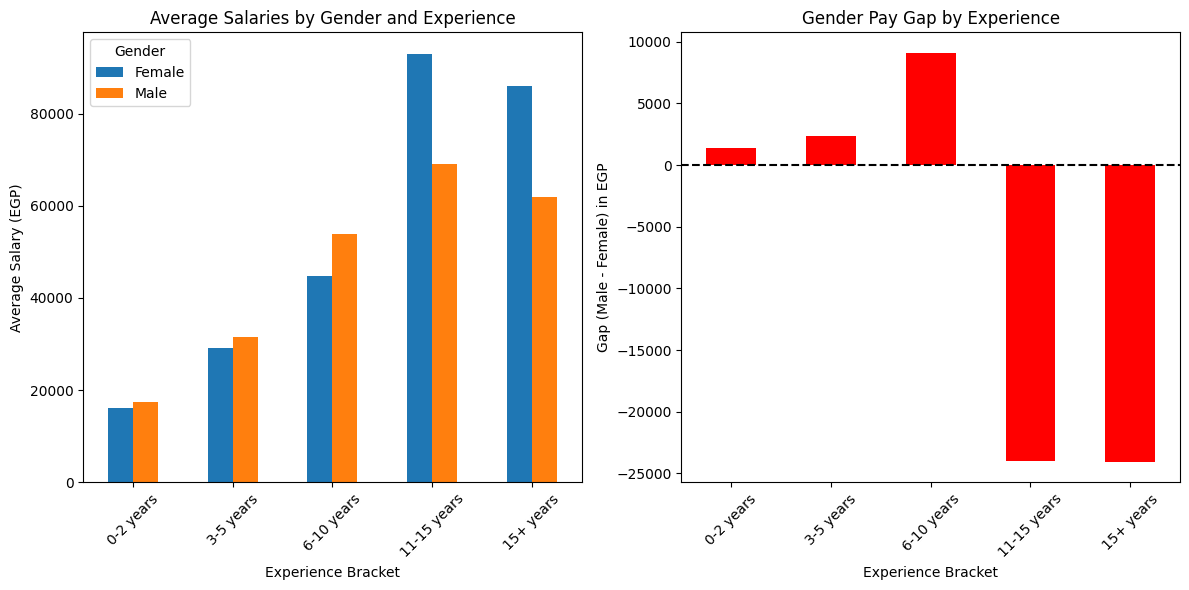

In [162]:
# Create a visualization of gender gap by experience bracket
plt.figure(figsize=(12, 6))
avg_by_exp_gender = df.groupby(['ExperienceBracket', 'Gender'], observed='True')['Salary'].mean().unstack()
gap_by_exp = avg_by_exp_gender['Male'] - avg_by_exp_gender['Female']

# Plot average salaries by gender and experience
ax1 = plt.subplot(121)
avg_by_exp_gender.plot(kind='bar', ax=ax1)
plt.title('Average Salaries by Gender and Experience')
plt.xlabel('Experience Bracket')
plt.ylabel('Average Salary (EGP)')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Plot the gap
ax2 = plt.subplot(122)
gap_by_exp.plot(kind='bar', color='red', ax=ax2)
plt.title('Gender Pay Gap by Experience')
plt.xlabel('Experience Bracket')
plt.ylabel('Gap (Male - Female) in EGP')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.show()

Percentage Comparison: The gap as a percentage of women's salaries.

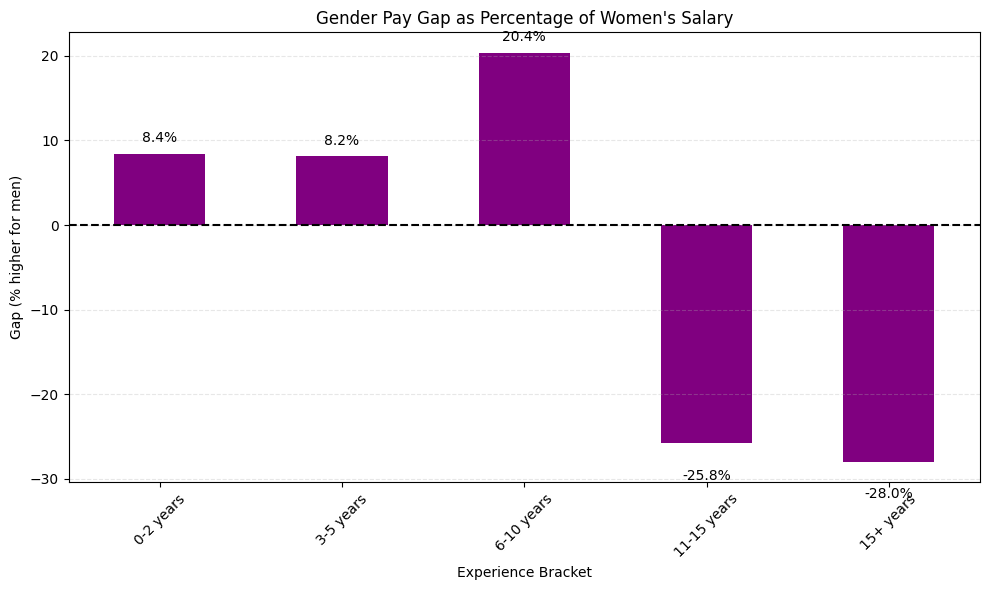

In [163]:
# Calculate gap as percentage of women's salary
pct_gap = (avg_by_exp_gender['Male'] / avg_by_exp_gender['Female'] - 1) * 100

plt.figure(figsize=(10, 6))
pct_gap.plot(kind='bar', color='purple')
plt.title('Gender Pay Gap as Percentage of Women\'s Salary')
plt.xlabel('Experience Bracket')
plt.ylabel('Gap (% higher for men)')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, v in enumerate(pct_gap):
    plt.text(i, v + (1 if v > 0 else -3), f"{v:.1f}%",
             ha='center', va='bottom' if v > 0 else 'top')

plt.tight_layout()
plt.show()

#### **Result of first Hypothesis:**
*   Even when controlling for experience, a significant gender pay gap persists.
*   The vast majority (85.5%) of the wage gap cannot be explained by differences in measurable characteristics, including experience.
*   The gap appears most pronounced and statistically significant in early to mid-career stages.

## 3- The Cost of being a Woman.

Now, with our last show [Yes, this is a show :)], We will try to control for some control variables such as **years of experience, title, and level** and try to find the *cost of being a woman*, aka, how much does a woman lose in a year in comparison to a man with the same year of experience.

To do this not impossible task (inshallah), we will try to predict salary by accounting for years of experience, title and level only with no regard to gender. We will train this model on male data only. Afterwards, we try to predict the women salaries as if they are men, and find the gap in salary.

Using the gap data found, we will construct a confidence interval with $\alpha=0.05$.

In [164]:
# Controlling for years of experience
import statsmodels.formula.api as smf
df_clone = egp_salary_df.copy()
model = smf.ols('Salary ~ YearsOfExperience + Title + Level', data=df_clone[df_clone["Gender"] == "Male"]).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     27.44
Date:                Mon, 26 May 2025   Prob (F-statistic):          7.78e-141
Time:                        09:27:39   Log-Likelihood:                -16165.
No. Observations:                1429   AIC:                         3.241e+04
Df Residuals:                    1390   BIC:                         3.261e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [165]:
df_clone['PredictedSalary'] = model.predict(df_clone) # Evalute the expected salary
df_clone['Residuals'] = df_clone['Salary'] - df_clone['PredictedSalary'] # Evaluate the residuals for all rows

residuals_by_gender = df_clone.groupby('Gender')['Residuals'].mean()
residuals_by_gender # Print point estiamtes for the residuals per each gender

Gender
Female   -2.381059e+02
Male      1.203346e-10
Name: Residuals, dtype: float64

In [ ]:
# Extracing residuals of women 
women_residuals = df_clone[df_clone['Gender'] == 'Female']['Residuals']

# Print some information about the women residuals
mean_residual = women_residuals.mean()
print(f"Mean residual for women: {mean_residual:.2f}")
print(f"Sample size (n): {n}")

Mean residual for women: -238.11
Sample size (n): 364


In [167]:
# Removing the top and bottom percentiles to avoid outliers
q_low = np.percentile(women_residuals, 3)
q_high = np.percentile(women_residuals, 97)
trimmed = [r for r in women_residuals if q_low <= r <= q_high]
n = len(trimmed)

In [182]:
# This is approach using the percentile method in conjunction with bootstrapping
# This doesn't assume normality
boot_means = np.mean(np.random.choice(women_residuals, size=(100000, n), replace=True), axis=1)
CI = np.percentile(boot_means, [2.5, 97.5])

print(boot_means)
print(f"95% Confidence Interval for the mean residual lies between {CI[0]:.2f} and {CI[1]:.2f}")

[-1774.5781345    342.1313769   1537.02900873 ...  -480.87744621
  -729.4835205   -697.0752351 ]
95% Confidence Interval for the mean residual lies between -1984.29 and 1602.21


In [183]:
print(len([x for x in boot_means if x > CI[0] and x < CI[1]]))
print(len([x for x in boot_means if x < CI[0]]))
print(len([x for x in boot_means if x < CI[0]]))

95000
2500
2500


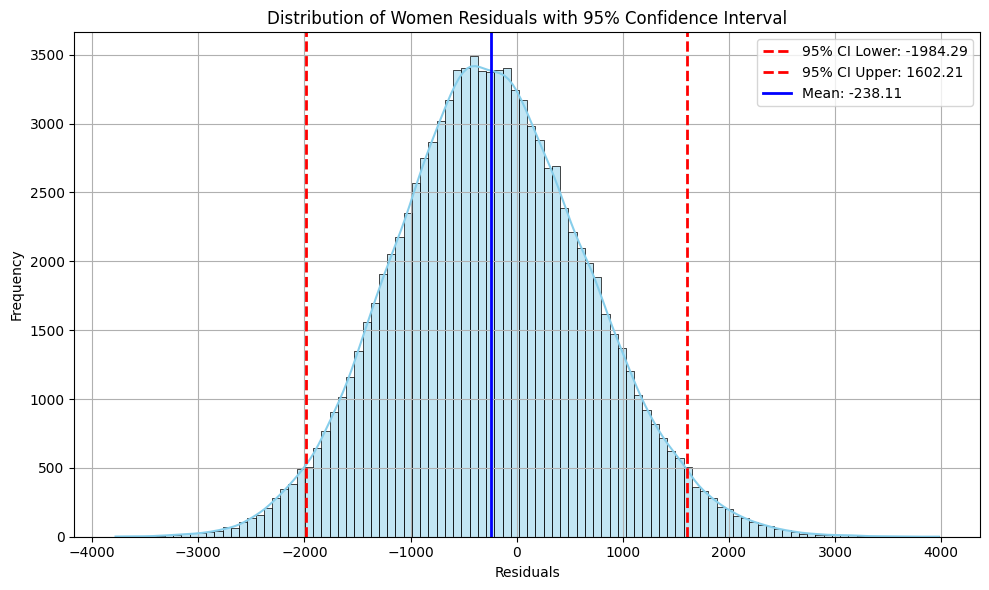

In [190]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(boot_means, bins=100, kde=True, color="skyblue", edgecolor="black")

# Add vertical lines for confidence interval
plt.axvline(CI[0], color='red', linestyle='--', linewidth=2, label=f'95% CI Lower: {CI[0]:.2f}')
plt.axvline(CI[1], color='red', linestyle='--', linewidth=2, label=f'95% CI Upper: {CI[1]:.2f}')
plt.axvline(mean_residual, color='blue', linestyle='-', linewidth=2, label=f'Mean: {mean_residual:.2f}')

# Labels and title
plt.title("Distribution of Women Residuals with 95% Confidence Interval")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [171]:
# import statsmodels.api as sm
# sm.qqplot(np.array(trimmed), line='s')
# plt.title("QQ Plot of Women Residuals")
# plt.show()